# **2/10: Higher-Order Environments, Currying, and Recursion**

## Q1: No Zeros
Write a function that removes all 0's from an integer.

In [ ]:
def no_zeros(n):
    """ 
    If n is a valid positive integer, no_zeros(n) returns n with all 0's removed.
    
    >>> no_zeros(0)
    0 
    >>> no_zeros(12093)
    1293 
    """
    if n < 10:    # if n == 0
        return n  #     return 0
    last, rest = n % 10, n // 10
    if last == 0:
        return no_zeros(rest)
    if last != 0:
        return 10 * no_zeros(rest) + last

Q1 Tests:

In [ ]:
t = no_zeros(0)
assert t == 0, f'Expected 0, but got {t}.'

t = no_zeros(10)
assert t == 1, f'Expected 1, but got {t}.'

t = no_zeros(123)
assert t == 123, f'Expected 123, but got {t}.'

t = no_zeros(10000001)
assert t == 11, f'Expected 10000001, but got {t}.'

t = no_zeros(2002340)
assert t == 2234, f'Expected 2234, but got {t}.'

## **Q2: Every Three**
Write a function that removes every third digit from an integer when reading right to left.

In [9]:
def remove_every_third(n):
    """ 
    If n is a valid positive integer, remove_every_third(n) returns n with every third digit removed.
    
    >>> remove_every_third(100)
    0 
    >>> no_zeros(12093)
    293 
    """
    def helper(n, i):
        last, rest = n % 10, n // 10
        if n == 0:
            return n
        elif i == 0:
            return helper(rest, 2)
        else:
            return 10 * helper(rest, i - 1) + last
        
    return helper(n, 2)

Q2 Tests:

In [10]:
t = remove_every_third(100100100100)
assert t == 0, f'Expected 0, but got{t}.'

t = remove_every_third(120100100100)
assert t == 20000000, f'Expected 20000000, but got{t}.'

t = remove_every_third(123342)
assert t == 2342, f'Expected 2342, but got{t}.'

t = remove_every_third(10)
assert t == 10, f'Expected 10, but got{t}.'

t = remove_every_third(0)
assert t == 0, f'Expected 0, but got{t}.'

## **Q3: Every N**

Key Concepts:
- Since we are returning a function, we know that we need at least one nested function that we can return. When we return this function, we don't call it.
- This returned function itself needs a helper in order to keep track of additional information. This helper is called.
  - Specifically, our helper will need a 'i' to keep track of the original value for 'i', and a 'j' that is intialized to 'i' but will be decremented each recursive call. When 'j' hits 0, we need to delete a digit and set it to equal 'i' again. Note that if we didn't have an additional 'i' variable, we can't restore 'j' back to our starting value.

In [11]:
def remove_every_i(i):
    """ 
    Write a function that returns a function that can remove every nth digit from a number when reading right to left.

    If n is a valid positive integer, remove_every_i(n, i) returns n with every ith digit removed.
    
    >>> every_ith_remover = remove_every_i(2)
    >>> every_ith_remover
    <Function>
    >>> every_ith_remover(120343)
    233
    """
    def f(n):
        def helper(n, i, j):
            last, rest = n % 10, n // 10
            if n == 0:
                return n
            elif j == 0:
                return helper(rest, i, i)
            else:
                return 10 * helper(rest, i, j - 1) + last
        return helper(n, i - 1, i - 1)
    return f

Q3 Tests:

In [12]:
every_second_remover = remove_every_i(2)
t = every_second_remover(120343)
assert t == 233, f'Expected 233, but got {t}.'

every_fifth_remover = remove_every_i(5)
t = every_fifth_remover(123)
assert t == 123, f'Expected 123, but got {t}.'

t = every_fifth_remover(12334012309439)
assert t == 123301239439, f'Expected 123301239439, but got {t}.'

# 2/17: Tree Recursion


## **Q1: Tiles**

Key Concepts:
- Since we are working with a 2D grid, our tree recursive call should have 4 calls representing each direction we can take in the grid.
- We need a helper and a seen array since the function would otherwise result in an infinite loop. One example of this would be if we looked to the left of our current position. And then from that position we look right, and from there we look left, and so on.

In [26]:
def tiles(s, x, y):
  """
  You are given a grid of tiles 's'. Shaded tiles are represented by 1's, 
  and blank tiles are represented by 0's. When tiles(s, x, y) is called on an
  coordinate (x, y), two things happen:
  1) The grid is mutated, with the tile at the coordinate being shaded.
  2) The total number of shaded tiles connected to the tile at the coordinate
     is returned. Connected is defined as being above/below/left/right of a tile.
  * You may assume that all calls will be a valid coordinate in the grid.
  >>> s = [[1, 0, 0, 0, 1],
           [1, 0, 1, 1, 0],
           [0, 0, 1, 0, 1],
           [1, 1, 1, 0, 0],
           [0, 0, 1, 1, 1]]
  >>> tiles(s, 2, 2)
  9
  """
  def f(x, y, seen):
    if x not in range(len(s)) or y not in range(len(s[0])):
      return 0
    elif s[x][y] and (x, y) not in seen:
      seen.add((x, y)) # seen.append if a list was used.
      directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
      return 1 + sum([f(x + i, y + j, seen) for i, j in directions])
      # Conceptually identical to:
      # f(x + 1, y, seen) + f(x - 1, y, seen) + f(x, y + 1, seen) + f(x, y - 1, seen)
    else:
      return 0
  s[x][y] = 1
  return f(x, y, set()) # Can also use a list. A set justs removes duplicates.

61a viz (10).svg

Q2 Tests:

In [27]:
s = [[1, 0, 0, 0, 1],
    [0, 0, 1, 1, 0],
    [0, 0, 1, 0, 1],
    [1, 1, 1, 0, 1],
    [0, 0, 1, 1, 1]]

t = tiles(s, 2, 2)
assert t == 11, f'Expected 11, but got {t}.'
assert s == [[1, 0, 0, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 0, 1], [1, 1, 1, 0, 1], [0, 0, 1, 1, 1]], f'Expected [[1, 0, 0, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 0, 1], [1, 1, 1, 0, 1], [0, 0, 1, 1, 1]] but got {s}.'


t = tiles(s, 1, 0)
assert t == 2, f'Expected 1, but got {t}.'
assert s == [[1, 0, 0, 0, 1], [1, 0, 1, 1, 0], [0, 0, 1, 0, 1], [1, 1, 1, 0, 1], [0, 0, 1, 1, 1]], f'Expected [[1, 0, 0, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 0, 1], [1, 1, 1, 0, 1], [0, 0, 1, 1, 1]] but got {s}.'

## **Q2: Size Capped Subsequences**
* This is not an original problem; I found it somewhere in my notes but forgot where it's from. Probably a past midterm?
- A good example of the common "select first or do not select first" pattern!

In [ ]:
def sc_sub(lst, n):
  """
  Return a list of all unique subsequences, represented as lists, of parameter 'lst', of size 'n'.
  
  >>> s = [1, 2, 3, 4, 5]
  >>> sc_sub(s, 0)
  [[]]
  >>> sc_sub(s, 2)
  [[1, 2], [1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5], [3, 4], [3, 5], [4, 5]]
  """
  if n == 0:
    return [[]]
  if len(lst) == n:
    return [lst]
  
  with_first = [[lst[0]] + x for x in sc_sub(lst[1:], n - 1)]
  without_first = sc_sub(lst[1:], n)

  return with_first + without_first

Q2 Tests:

In [ ]:
s = [1, 2, 3, 4, 5]
t = sc_sub(s, 2)
exp = [[1, 2], [1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5], [3, 4], [3, 5], [4, 5]]
assert t == exp, f'Expected {exp}, but got {t}.'

t = sc_sub(s, 0)
exp = [[]]
assert t == exp, f'Expected {exp}, but got {t}.'

t = sc_sub(s, 1)
exp = [[1], [2], [3], [4], [5]]
assert t == exp, f'Expected {exp}, but got {t}.'

t = sc_sub(s, 3)
exp = [[1, 2, 3],
    [1, 2, 4],
    [1, 2, 5],
    [1, 3, 4],
    [1, 3, 5],
    [1, 4, 5],
    [2, 3, 4],
    [2, 3, 5],
    [2, 4, 5],
    [3, 4, 5]]
assert t == exp, f'Expected {exp}, but got {t}.'

## **Q3: String Permutations**

Key Concepts:
- Since our iterable sequence is a string, our base case should just be a list containing nothing ('').
- Devising a way to implement finding permutations:
  - This particular implementation moves each character through each position in the String. Then it recurses on the remaining characters, since they represent a smaller subproblem of our original case!

In [ ]:
def string_perm(s):
  """
  Return a list of all permutations of a string.
  There should be no duplicates, unless, there are duplicate letters.

  >>> string_perm('')
  ['']
  >>> string_perm('wop')
  ['wop', 'wpo', 'owp', 'opw', 'pwo', 'pow']
  """
  if not s:
    return ['']
  res = []
  for i in range(len(s)):
    res += [s[i] + x for x in string_perm(s[:i] + s[i + 1:])]
  return res

In [ ]:
exp = ['wop', 'wpo', 'owp', 'opw', 'pwo', 'pow']
t = string_perm('wop')
assert t == exp, f'Expected {exp}, but got {t}.'

# **2/24: Sequences and Containers**

## **Q1: WWPD**

In [ ]:
total = 0

def func(x, y):
    return [x, y]

for el in [func(i, i) for i in range(3)]:
    total += sum(el)

Run the cell below to view the answer:

In [ ]:
print(f'The value of total is {total}.')

The value of total is 6.


## **Q2: Letter Check**

In [ ]:
def letter_check(lst, letter):
  """ Return whether letter is present in every string of lst.
  >>> s = ['dog', 'deck', 'dolly']
  >>> letter_check(s, 'd') 
  True
  """
  return all([letter in w for w in lst])

Q2 Tests:

In [ ]:
s = ['dog', 'deck', 'dolly']
t = letter_check(s, 'd')
assert t == True, f'Expected True, but got {t}'
t = letter_check(s, 'e')
assert t == False, f'Expected False, but got {t}'

## **Q3: Letter Count**

In [ ]:
def letter_count(word, letter):
  """ 
  Return number of times letter appears in word.
  >>> letter_count('mississppi', 's')
  4
  """
  return len([c for c in word if c == letter])

Q3 Tests:

In [ ]:
t = letter_count('mississppi', 'i')
assert t == 3, f'Expected 3, but got {t}'

t = letter_count('9flalfkd', 'f')
assert t == 2, f'Expected 2, but got {t}'

t = letter_count('9flalfkd', 'z')
assert t == 0, f'Expected 0, but got {t}'

## **Q4: Rotate**

In [ ]:
def spinny(s):
  """ 
  Write a function that will return s with all of its elements 'rotated' left upon every call.
  In a rotation, every element is moved to the spot to its right, and the final element is moved to the beginning.
  The list should be mutated.

  >>> s = [1, 2, 3, 4]
  >>> spinny(s)
  [2, 3, 4, 1]
  >>> spinny(s)
  [3, 4, 1, 2]
  >>> spinny(s)
  [4, 1, 2, 3]
  >>> spinny(s)
  [1, 2, 3, 4]
  """  
  s.append(s.pop(0))
  return s

Q4 Tests:

In [ ]:
s = [1, 2, 3, 4]
spinny(s)
assert s == [2, 3, 4, 1], f'Expected [2, 3, 4, 1], but got {s}'

spinny(s)
assert s == [3, 4, 1, 2], f'Expected [3, 4, 1, 2], but got {s}'

spinny(s)
assert s == [4, 1, 2, 3], f'Expected [4, 1, 2, 3], but got {s}'

spinny(s)
assert s == [1, 2, 3, 4], f'Expected [1, 2, 3, 4], but got {s}'

## **Q5: Rise and Fall**

In [ ]:
def cresdecrescendo(low, high, n):
  """
  Return a list of integers of the pattern, repeated n times.
  [low, low + 1, ..., high - 1, high, high - 1, ..., low + 1, low] repeated n times.
  When n > 1, the low value that connects two iterations should not be duplicated.

  >>> cresdecrescendo(1,5,3)
  [1, 2, 3, 4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1]
  """
  return ([i for i in range(low, high + 1)] + [i for i in range(low + 1, high)][::-1])*n + [low]

  # Alt
  # return (list(range(low, high + 1)) + (list(range(low + 1, high)))[::-1])*n + [low]

Q5 Tests:

In [ ]:
t = cresdecrescendo(1, 2, 3)
exp = [1, 2, 1, 2, 1, 2, 1]
assert t == exp, f'Expected {exp}, but got {t}.'

t = cresdecrescendo(1, 5, 3)
exp = [1, 2, 3, 4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1]
assert t == exp, f'Expected {exp}, but got {t}.'

t = cresdecrescendo(3, 5, 4)
exp = [3, 4, 5, 4, 3, 4, 5, 4, 3, 4, 5, 4, 3, 4, 5, 4, 3]
assert t == exp, f'Expected {exp}, but got {t}.'

## **Q6: Rotating Split**

In [ ]:
def rotating_split(lst, n):
  """
  Write a function that models the below behavior. There should be n lists in the returned list.
  s = [1, 2, 3, 4]
  >>> rotating_split(s, 6)
  [[1, 2, 3, 4], [2, 3, 4], [3, 4], [4], [1, 2, 3, 4], [2, 3, 4]]
  """
  return [lst[i % len(lst):] for i in range(n)]

Q6 Tests:

In [ ]:
s = [1, 2, 3, 4]
exp = [[1, 2, 3, 4], [2, 3, 4], [3, 4], [4], [1, 2, 3, 4], [2, 3, 4]]
t = rotating_split(s, 6)
assert t == exp, f'Expected {exp}, but got {t}.'

## **Q7: Rearrange**

In [1]:
def rearrange(lst):
  """
  Write a function that returns a list of all unique "rotations" of lst, as specified by Q4.
  >>> s = [1, 2, 3, 4]
  >>> rearrange(s)
  [[1, 2, 3, 4], [2, 3, 4, 1], [3, 4, 1, 2], [4, 1, 2, 3]]
  >>> s = [0, 2, 4]
  >>> rearrange(s)
  [[0, 2, 4], [2, 4, 0], [4, 0, 2]]
  """
  return [lst[i:] + lst[:i] for i in range(len(lst))]

Q7 Tests:

In [2]:
s = [1, 2, 3, 4]
t = rearrange(s)
exp = [[1, 2, 3, 4], [2, 3, 4, 1], [3, 4, 1, 2], [4, 1, 2, 3]]
assert t == exp, f'Expected {exp}, but got {t}.'

## **Q8: Identity**

In [ ]:
def identity(n):
  """
  Replicate the behavior of numpy.identity.
  Return the n x n identity matrix represented as a list of lists for n > 1.
  https://numpy.org/devdocs/reference/generated/numpy.identity.html

  >>> identity(5)
  [[1, 0, 0, 0, 0], 
   [0, 1, 0, 0, 0], 
   [0, 0, 1, 0, 0], 
   [0, 0, 0, 1, 0], 
   [0, 0, 0, 0, 1]]
  """
  return [[1 if i == j else 0 for i in range(1, n + 1)] for j in range (1, n + 1)]

Q6 Tests:

In [ ]:
t = identity(5)
exp = [[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]
assert t == exp, f'Expected {exp} but got {t}'

## **Q9: Dictionary to List**

In [ ]:
def d2l(d):
  """
  Takes dictionary d and returns a list of lists.
  One deep list will be created for each key-value pair in the dictionary.
  Each deep list contains:
  1) The dictionary itself
  2) the key
  3) the value.

  >>> d = {0 : 'a', 1 : 'b', 2 : 'c'}
  >>> d2l(d)
  [[{0: 'a'}, 0, 'a'],
   [{1: 'b'}, 1, 'b'], 
   [{2: 'c'}, 2, 'c']]
  """
  return [[{i:j}, i, j] for i, j in zip(list(d), list(d.values()))]

Q9 Tests:

In [ ]:
d = {0 : 'a', 1 : 'b', 2 : 'c'}
t = d2l(d)
exp = [[{0: 'a'}, 0, 'a'], [{1: 'b'}, 1, 'b'], [{2: 'c'}, 2, 'c']]
assert t == exp, f'Expected {exp}, but got {t}.'

## **Q10: Map by Letter**

In [ ]:
def map_by_letter(s):
  """ 
  Return a dictionary mapping every letter in all words to a list of unique words containing the letter.
  >>> s = ['dog', 'door', 'road']
  >>> sort_by_letter(s)
  {
   'd': ['dog', 'door', 'road'], 
   'o': ['dog', 'door', 'road'], 
   'g': ['dog'], 
   'r': ['door', 'road'], 
   'a': ['road']
  }
  """
  m = {}
  for w in s:
    for c in w:
      if c not in m:
        m[c] = [w]
      else:
        if w not in m[c]:
          m[c].append(w)
  return m

Q10: Tests

In [ ]:
s = ['hi']
t = map_by_letter(s)
assert t == {'h' : ['hi'], 'i' : ['hi']}

s = ['hi', 'hi']
t = map_by_letter(s)
assert t == {'h' : ['hi'], 'i' : ['hi']}

s = ['hi', 'pi']
t = map_by_letter(s)
exp = {'h' : ['hi'], 'i' : ['hi', 'pi'], 'p' : ['pi']}
assert t == exp, f'Expected {exp}, but got {t}'

# 3/3: Immutable Trees (ADT)

Run below cell (CS 61A's ADT tree implementation) before doing the problems.

In [16]:
def tree(label, branches=[]):
    """Construct a tree with the given label value and a list of branches."""
    return [label] + list(branches)

def label(tree):
    """Return the label value of a tree."""
    return tree[0]

def branches(tree):
    """Return the list of branches of the given tree."""
    return tree[1:]

def is_leaf(tree):
    """Returns True if the given tree's list of branches is empty, and False
    otherwise.
    """
    return not branches(tree)

## Q1: Flood

Key Concepts:
- Recognizing that the number of leaves will be variable and creating branches via a loop.
- The structure for recursively constructing a tree based off of data selected from an existing tree.

In [13]:
def flood(t):
    """
    Water floods in the direction from the root of a tree toward its leaves.
    At the leaves are n-sized walls, containing the flood, 
    composed of n '-'s concatenated together.
    Every other node is flowing water, represented by an arbitrary number of '{'s.
    When flood is called, water flows downstream, damaging a chunk of the wall and removing a '-'.
    Once all '-'s have been chipped away, the water pushes the fragment of the wall downstream infinitely.
    The number of resulting fragments should equal the size of the wall n.
    Write a function that takes a tree and returns the tree after one iteration
    of water flow, with behavior as described above.
    Instead of doctests, refer to the images in the below cell.
    """
    if is_leaf(t) and letter_count(label(t), '-') == 0:
        n = len(label(t))
        fragments = [tree('-') for _ in range(n)]
        return tree(n * '{', fragments)
    elif is_leaf(t):
        return tree('{' + label(t)[:-1])
    else:
        return tree(label(t), [flood(b) for b in branches(t)])

In [14]:
def letter_count(word, letter):
  """ 
  Return number of times letter appears in word.
  >>> letter_count('mississppi', 's')
  4
  """
  return len([c for c in word if c == letter])

61a viz (2).svg

61a viz (3).svg

61a viz (5).svg

61a viz (7).svg

61a viz (8).svg

In [17]:
t = tree('{{{', [tree('{{{', [tree('---'), tree('--')]), tree('{{{', [tree('----'), tree('------')])])
exp1 = ['{{{', ['{{{', ['{--'], ['{-']], ['{{{', ['{---'], ['{-----']]]
exp2 = ['{{{', ['{{{', ['{{-'], ['{{']], ['{{{', ['{{--'], ['{{----']]]
exp3 = ['{{{', ['{{{', ['{{{'], ['{{', ['-'], ['-']]], ['{{{', ['{{{-'], ['{{{---']]]
exp4 = ['{{{', ['{{{', ['{{{', ['-'], ['-'], ['-']], ['{{', ['{'], ['{']]], ['{{{', ['{{{{'], ['{{{{--']]]
assert flood(t) == exp1, f'Expected {exp1}, but got {t}.'
assert flood(flood(t)) == exp2, f'Expected {exp2}, but got {t}.'
assert flood(flood(flood(t))) == exp3, f'Expected {exp3}, but got {t}.'
assert flood(flood(flood(flood(t)))) == exp4, f'Expected {exp4}, but got {t}.'

## Q2: Path of Least Resistance

Key Concepts:
- Using a lambda function to compare difference of Tree's labels (as opposed to attempting to subtract trees)
- Building a list by tracing backwards through the recursive call stack.
- Understanding that we only need to build one list (as opposed to selecting between multiple paths) because the next node to choose is immediately deterministic at each level.

In [ ]:
def lazy(t):
    """
    Takes an integer tree and returns a list of the labels along the path of least resistance.
    This path is defined as the one that minimizes the absolute pairwise difference
    between each node and its subsequent node. If two paths have the same difference, either path is fine.
    i.e. the next node in a path should have as small of difference with the current node as possible.
    >>> t = tree(2, [tree(7, [tree(3), tree(6, [tree(5), tree(11)])] ), tree(15)])
    >>> lazy(2)
    [2, 7, 6, 5]
    """
    if is_leaf(t):
        return [label(t)]
    else:
        min_path = min(branches(t), key = lambda b: abs(label(t) - label(b)))
        full_path = lazy(min_path)       
        return [label(t)] + full_path

61a viz (1).svg
Q2 Tests:

In [ ]:
t = tree(1, 
         [tree(3, 
               [tree(7, 
                     [tree(20), tree(-4), tree(1)]), 
                tree(5, 
                     [tree(1), 
                      tree(8, 
                           [tree(16), tree(0)])])])])
test = lazy(t)
exp = [1, 3, 5, 8, 16]
assert test == exp, f'Expected {exp}, but got {test}.'

t = tree(0, [t, tree(0)])
test = lazy(t)
exp = [0, 0]
assert test == exp, f'Expected {exp}, but got {test}.'

## Q3: Levelist

In [ ]:
def level(t):
  """
  Return a deep list 'lst' such that 'lst[i]' is a list
  of all labels at tree depth i. The depth of a tree1 i
  node is defined as its distance from the root. The
  root node has depth 0, and all of its branches are
  of depth 1.

  >>> t = Tree(1, [Tree(2, [Tree(4, [Tree(8)]), Tree(5)]), Tree(3, [Tree(6), Tree(7)])])
  >>> level(t)
  [[1], [2, 3], [4, 5, 6, 7], [8]]
  """

  def helper(t, res, lev):
    if lev == len(res):
      res.append([])
    res[lev].append(label(t))
    for b in branches(t):
      helper(b, res, lev + 1)
    return res
  return helper(t, [], 0)

Q3 Tests:

In [ ]:
tr = tree(1, [tree(2, [tree(4, [tree(8)]), tree(5)]), tree(3, [tree(6), tree(7)])])
t = level(tr)
exp = [[1], [2, 3], [4, 5, 6, 7], [8]]
assert t == exp, f'Expected {exp}, but got {t}.'

# **3/10: Iterators & Generators**

## Q1: WWPD

In [ ]:
def wwpd():
  for i in range(3):
    print(i)
    i += 100
    print(i)

Uncomment and run the below cell to check your answer.

In [ ]:
wwpd()

0
100
1
101
2
102


## Q2: Flatten

In [ ]:
def flatten(s):
    """
    Create a generator that sequentially yields the
    elements of a potentially deep list.
    >>> list(flatten([1, 2, 3]))
    [1, 2, 3]
    >>> list(flatten([1, [2], [3, [4, 5]]]))
    [1, 2, 3, 4, 5]
    """
    for i in s:
        if type(i) is not list:
            yield i
        else:
            yield from flatten(i)

Q2 Tests:

In [ ]:
s = [1, 2, 3]
t = list(flatten(s))
exp = [1, 2, 3]
assert t == exp, f'Expected {exp}, but got {t}.'

s = [1, [2], [3, [4, 5]]]
t = list(flatten(s))
exp = [1, 2, 3, 4, 5]
assert t == exp, f'Expected {exp}, but got {t}.'

## **Q3: DeNest**

Key Concepts:
- Designing a mechanism for detecting when an open bracket has a matching closed bracket. 
- This particular solution initializes a bracket count at 0, increments at '[', decrements at ']', and breaks when the count reaches 0 again. This means that the brackets are balanced.
- Understanding the need for a boolean flag since otherwise there would be no way to enter the loop in the first place (ex. while bracket_count != wouldn't work since it's initialized to 0).
- Understanding that the inner while's goal is to find the index of the closing bracket that matches the open bracket. Once it is found, we set it to end, since it marks the index where one bracket-enclosed segment ends.
- Understanding that this implementation doesn't mutate/slice the string and instead simply yields from our input string.

In [ ]:
def denest(s):
  """
  Write a function that takes an input string with nested brackets and
  returns a generator that yields the string with everything up to the
  next pair of brackets removed from both sides (starting with the
  outermost brackets). You may assume that there each input will have 
  as many open brackets as closed brackets.

  Refer the image below for a reference.

  >>> text = '21[1[/-[[23]32f]dsfg]-]1y'
  >>> g = (denest(text)
  >>> next(g)
  '[1[/-[[23]32f]dsfg]-]'
  >>> next(g)
  '[/-[[23]32f]dsfg]'
  """
  start, end = 0, -1
  while start < len(s):
    if s[start] == '[':
      bracket_count = 0
      balanced_brackets = False
      old_start = start
      while not balanced_brackets:
        if s[start] == '[':
          bracket_count += 1
        elif s[start] == ']':
          bracket_count -= 1
        if bracket_count == 0:
          balanced_brackets = True
        start += 1
      end = start
      start = old_start + 1
      yield s[old_start : end]
    else:
      start += 1

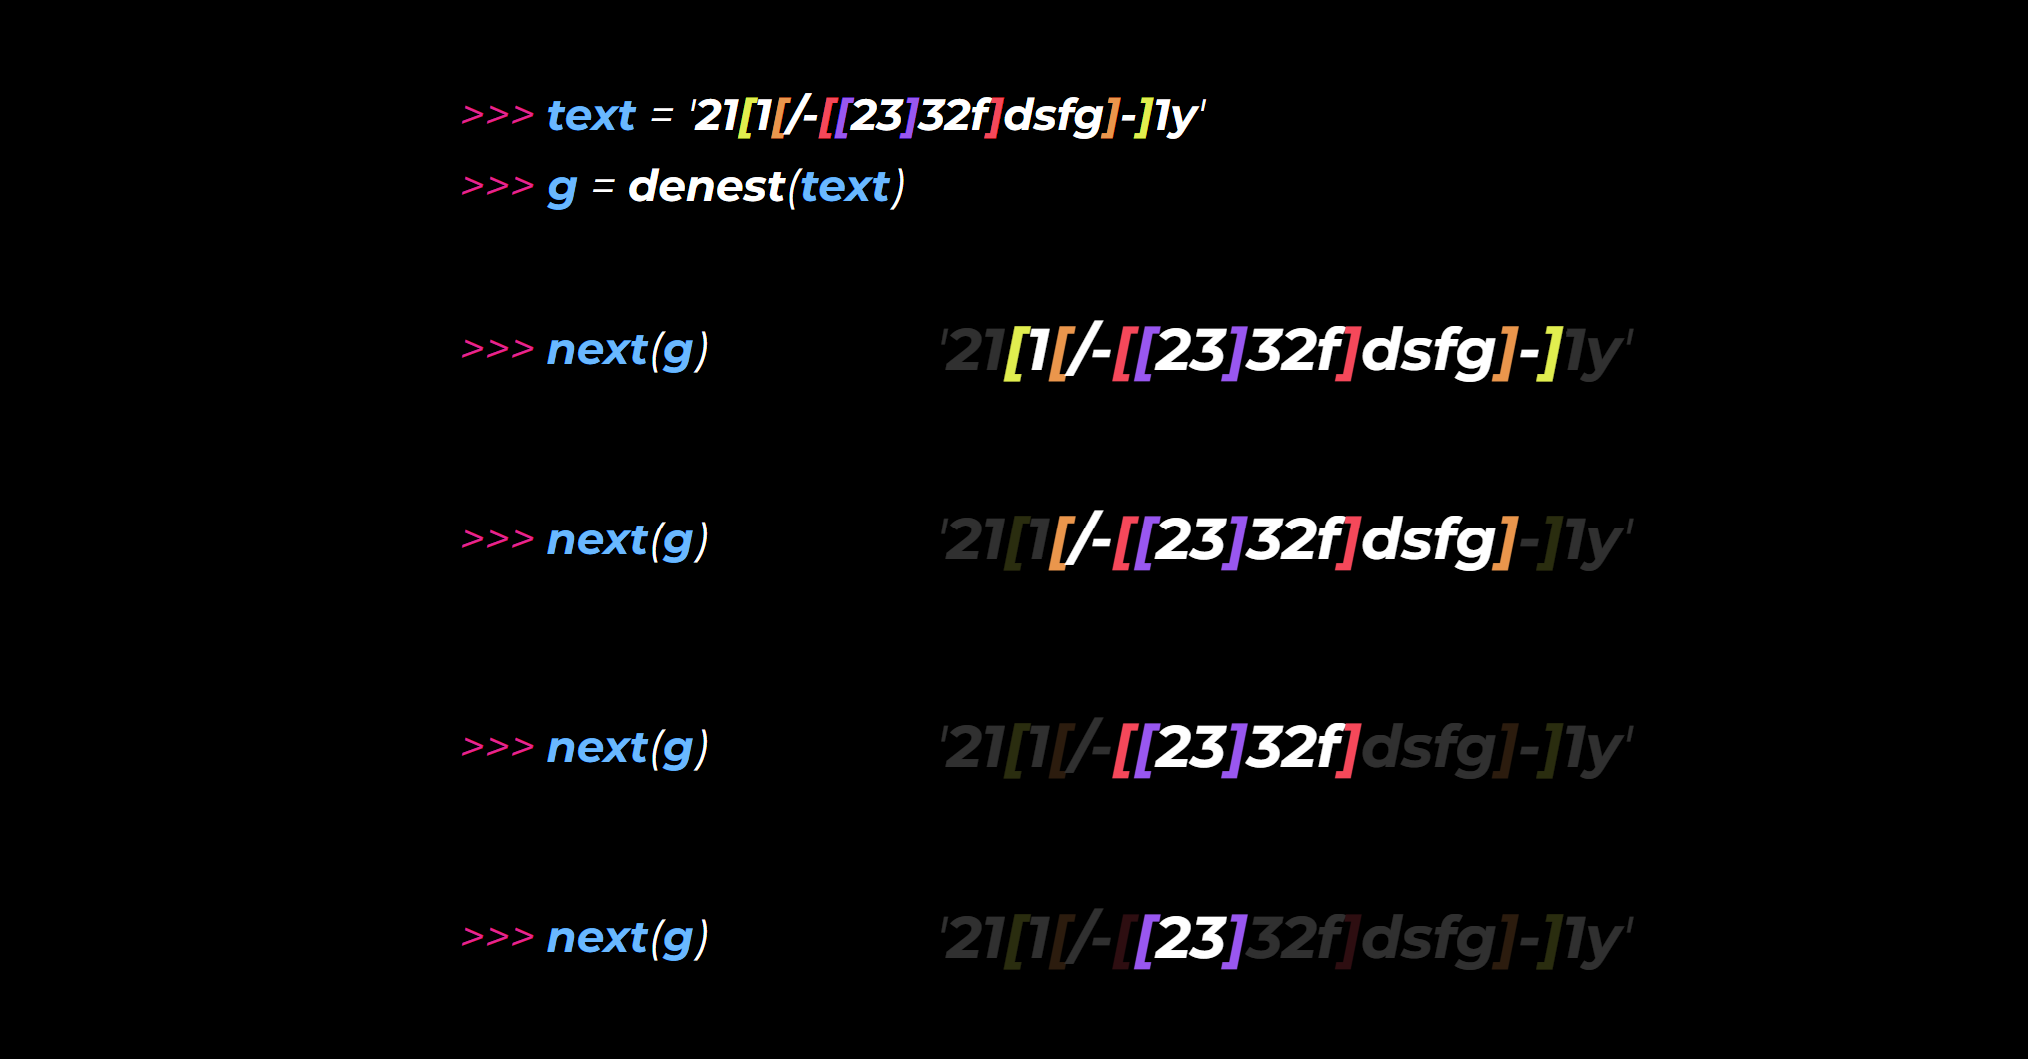

Q3 Tests:

In [ ]:
text = '21[1[/-[[23]32f]dsfg]-]1y'
t = list(denest(text))
exp = ['[1[/-[[23]32f]dsfg]-]', '[/-[[23]32f]dsfg]', '[[23]32f]', '[23]']
assert t == exp, f'Expected {exp} but got {t}.'

text = '[[[[[[[]]]]]]]'
t = list(denest(text))
exp = ['[[[[[[[]]]]]]]', '[[[[[[]]]]]]', '[[[[[]]]]]', '[[[[]]]]', '[[[]]]', '[[]]', '[]']
assert t == exp, f'Expected {exp} but got {t}.'

## **Q4: ReDeNest**

Key Concepts:
- Realizing the behavior of this implementation: 
  - Successively chopping off characters off the string from each end until it starts with a '[' and ends in an ']'.
- Understanding when iteration should terminate (when there are less than two characters since this means we have just '[]' and nothing else.
- Understanding when where to use 'yield from' and 'yield'. 
  - The recursive calls use 'yield from' since we to continue recursing and breaking our string into smaller subproblems.
  - The base case first 'yield's the desired String output, and then uses 'yield from' to continue generating remaining results.

In [18]:
def redenest(s):
  """
  Define DeNest recursively! Refer to the image above as a reference.

  >>> text = '21[1[/-[[23]32f]dsfg]-]1y'
  >>> g = redenest(text)
  >>> next(g)
  '[1[/-[[23]32f]dsfg]-]'
  >>> next(g)
  '[/-[[23]32f]dsfg]'
  """
  if len(s) < 2:          
    return
  elif s[0] == '[' and s[-1] == ']':
    yield s
    yield from redenest(s[1:-1])
  elif s[0] != '[':
    yield from redenest(s[1:])
  elif s[len(s) - 1] != ']':
    yield from redenest(s[:-1])

In [19]:
text = '21[1[/-[[23]32f]dsfg]-]1y'
t = list(redenest(text))
exp = ['[1[/-[[23]32f]dsfg]-]', '[/-[[23]32f]dsfg]', '[[23]32f]', '[23]']
assert t == exp, f'Expected {exp} but got {t}.'

text = '[[[[[[[]]]]]]]'
t = list(redenest(text))
exp = ['[[[[[[[]]]]]]]', '[[[[[[]]]]]]', '[[[[[]]]]]', '[[[[]]]]', '[[[]]]', '[[]]', '[]']
assert t == exp, f'Expected {exp} but got {t}.'

# **3/24: Mutable Trees**

Run below cell (CS 61A's Tree class implementation) before doing the problems.

In [ ]:
class Tree:
    """
    >>> t = Tree(3, [Tree(2, [Tree(5)]), Tree(4)])
    >>> t.label
    3
    >>> t.branches[0].label
    2
    >>> t.branches[1].is_leaf()
    True
    """
    def __init__(self, label, branches=[]):
        for b in branches:
            assert isinstance(b, Tree)
        self.label = label
        self.branches = list(branches)

    def is_leaf(self):
        return not self.branches
   
    def __repr__(self):
      if self.branches:
        return 'Tree({0}, {1})'.format(self.label, repr(self.branches))
      else:
        return 'Tree({0})'.format(repr(self.label))

## **Q1: Overthrow**

Key Concepts:
- Since we are bubbling nodes upwards, we should take a "bottom up" approach, where we recurse all the way to the leaves, and the consider each leaf one by one.
- Note that we don't need any base cases since nothing special happens when we reach a leaf. In our code, when we reach a leaf, the for loop won't execute, and we'll just return to the previous frame.
- Note the double assignment trick to swap values. We would otherwise need three lines with a temp variable.

In [ ]:
def overthrow(t, x):
  """
  Write a function that takes tree 't' and bubbles 'x' to the root.
  The 'bubble' process entails swapping 'x' with its parent until
  it is located at the root. Assume that all nodes are unique,
  although the tree may not contain 'x'.
  """
  for b in t.branches:
    overthrow(b, x)  
    if b.label == x:
      t.label, b.label = b.label, t.label 

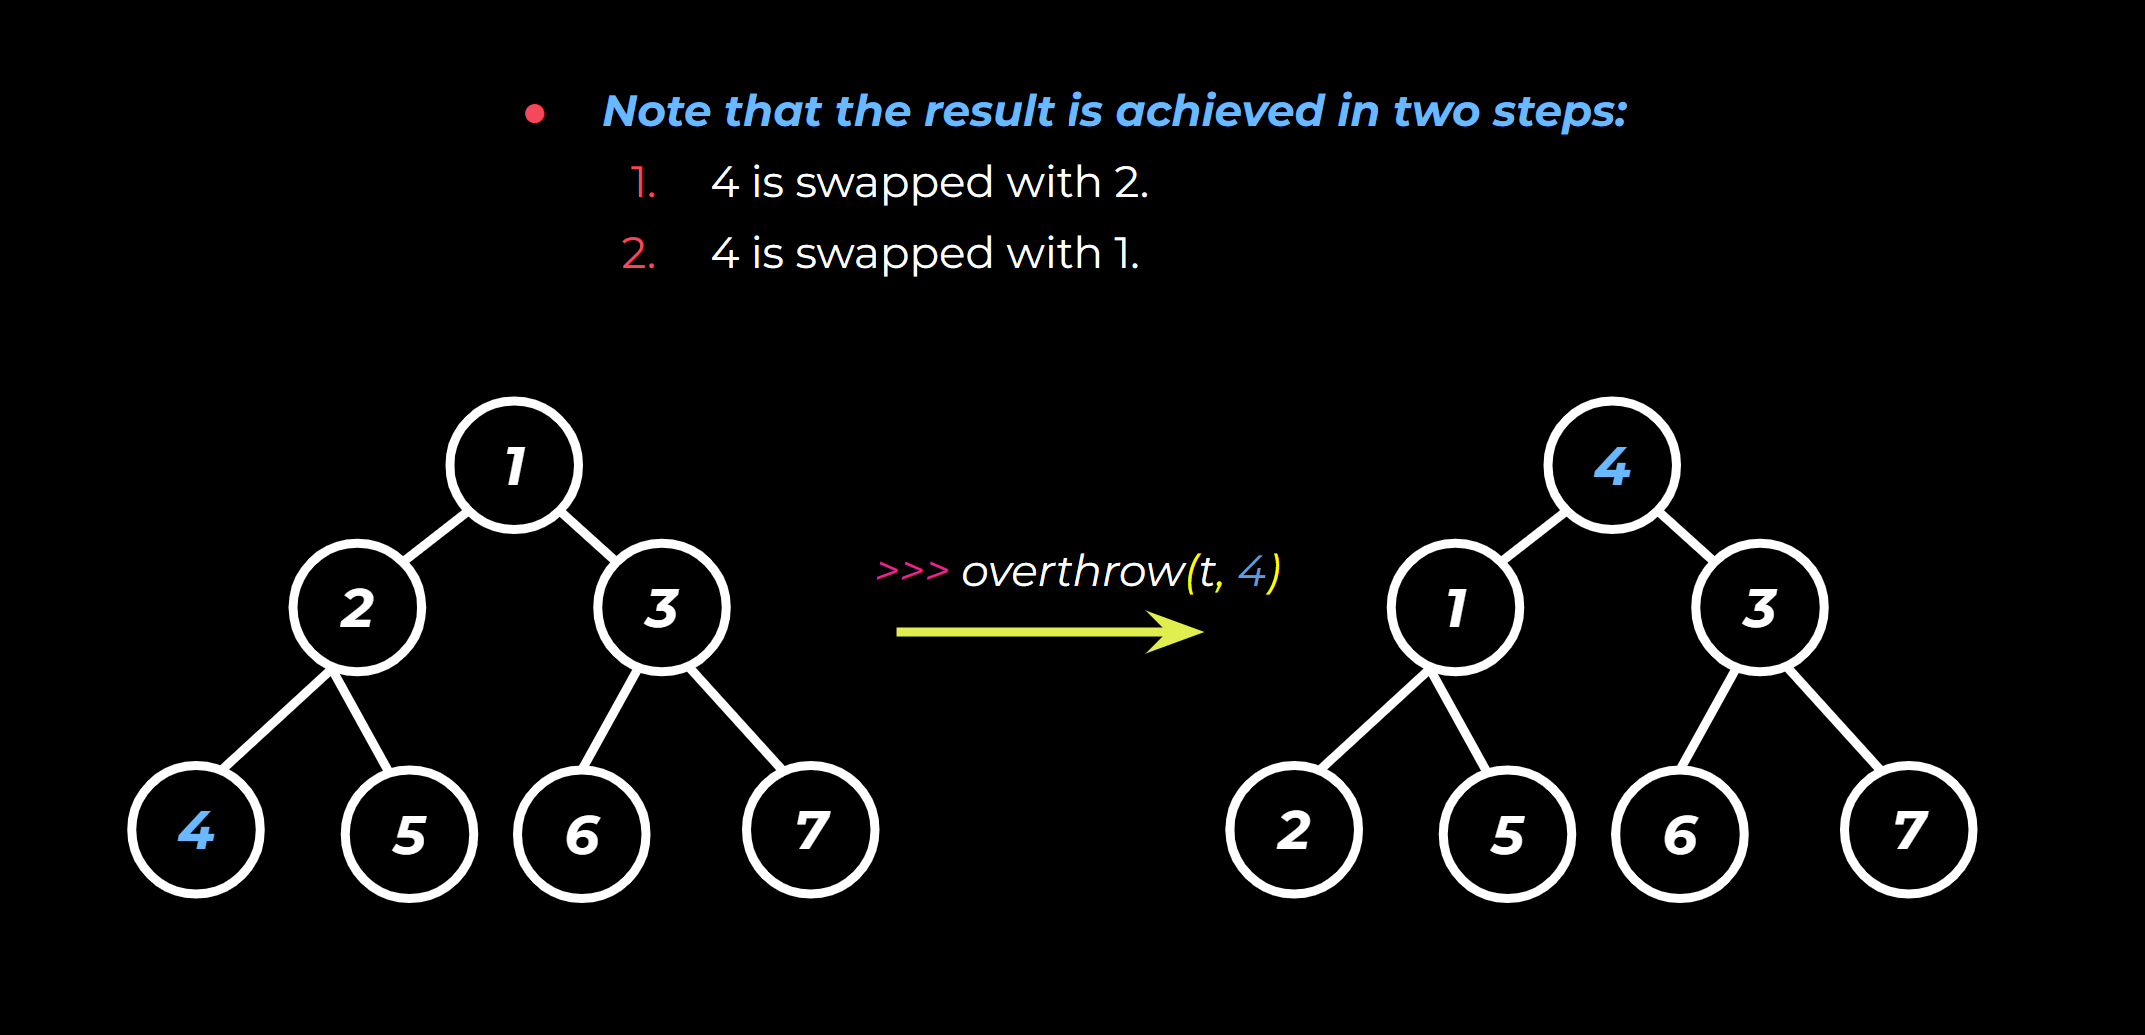

Q1 Tests:

In [ ]:
t = Tree(1, [Tree(2, [Tree(4), Tree(5), Tree(3, [Tree(6), Tree(7)])])])
overthrow(t, 4)
t
# Should be 
# Tree(4, [Tree(1, [Tree(2), Tree(5), Tree(3, [Tree(6), Tree(7)])])])

Tree(4, [Tree(1, [Tree(2), Tree(5), Tree(3, [Tree(6), Tree(7)])])])

## **Q2: Delete & Displace**

Key Concepts: 
- Note that we find a node to delete, we can't outright set its parent's branches to the node's branches. Instead we have to add them in so we don't affect the other Trees currently stored in the branches.
  - This means that this problem could be solved by just extending a deleted node's parent's branches with the node's branches, however, this won't maintain order since those branches will always be added at the end.
- As a result, we need to keep track of where we are with an index. And we use slicing to insert the deleted node's branches in the right spot in relation to its parent's branches.
- If we go through the branches normally, we have the case where the len(branches(t)) is changing as we iterate through it. As a result, we have to iterate backwards so that every branch will be considered.
- Placing the recursive call after the if condition results in a case where x's at the leaf will not be deleted. That's why we place it before the call. We need to get all the way to the leaves before we subject them to conditionals.

In [ ]:
def delete(t, x):
  """
  Delete any occurrence of the 'x' within Tree 't'. When a non-leaf
  node is deleted, the node's children should point to the node's
  parent. The order of the branches must be preserved.
  Assume that the root will never be deleted.
  """
  # equivalent:
  # for i in reversed(range(len(t.branches)))
  for i in range(len(t.branches))[::-1]:
    b = t.branches[i]
    delete(b, x)
    if b.label == x:
      t.branches = t.branches[:i] + b.branches + t.branches[i + 1:]

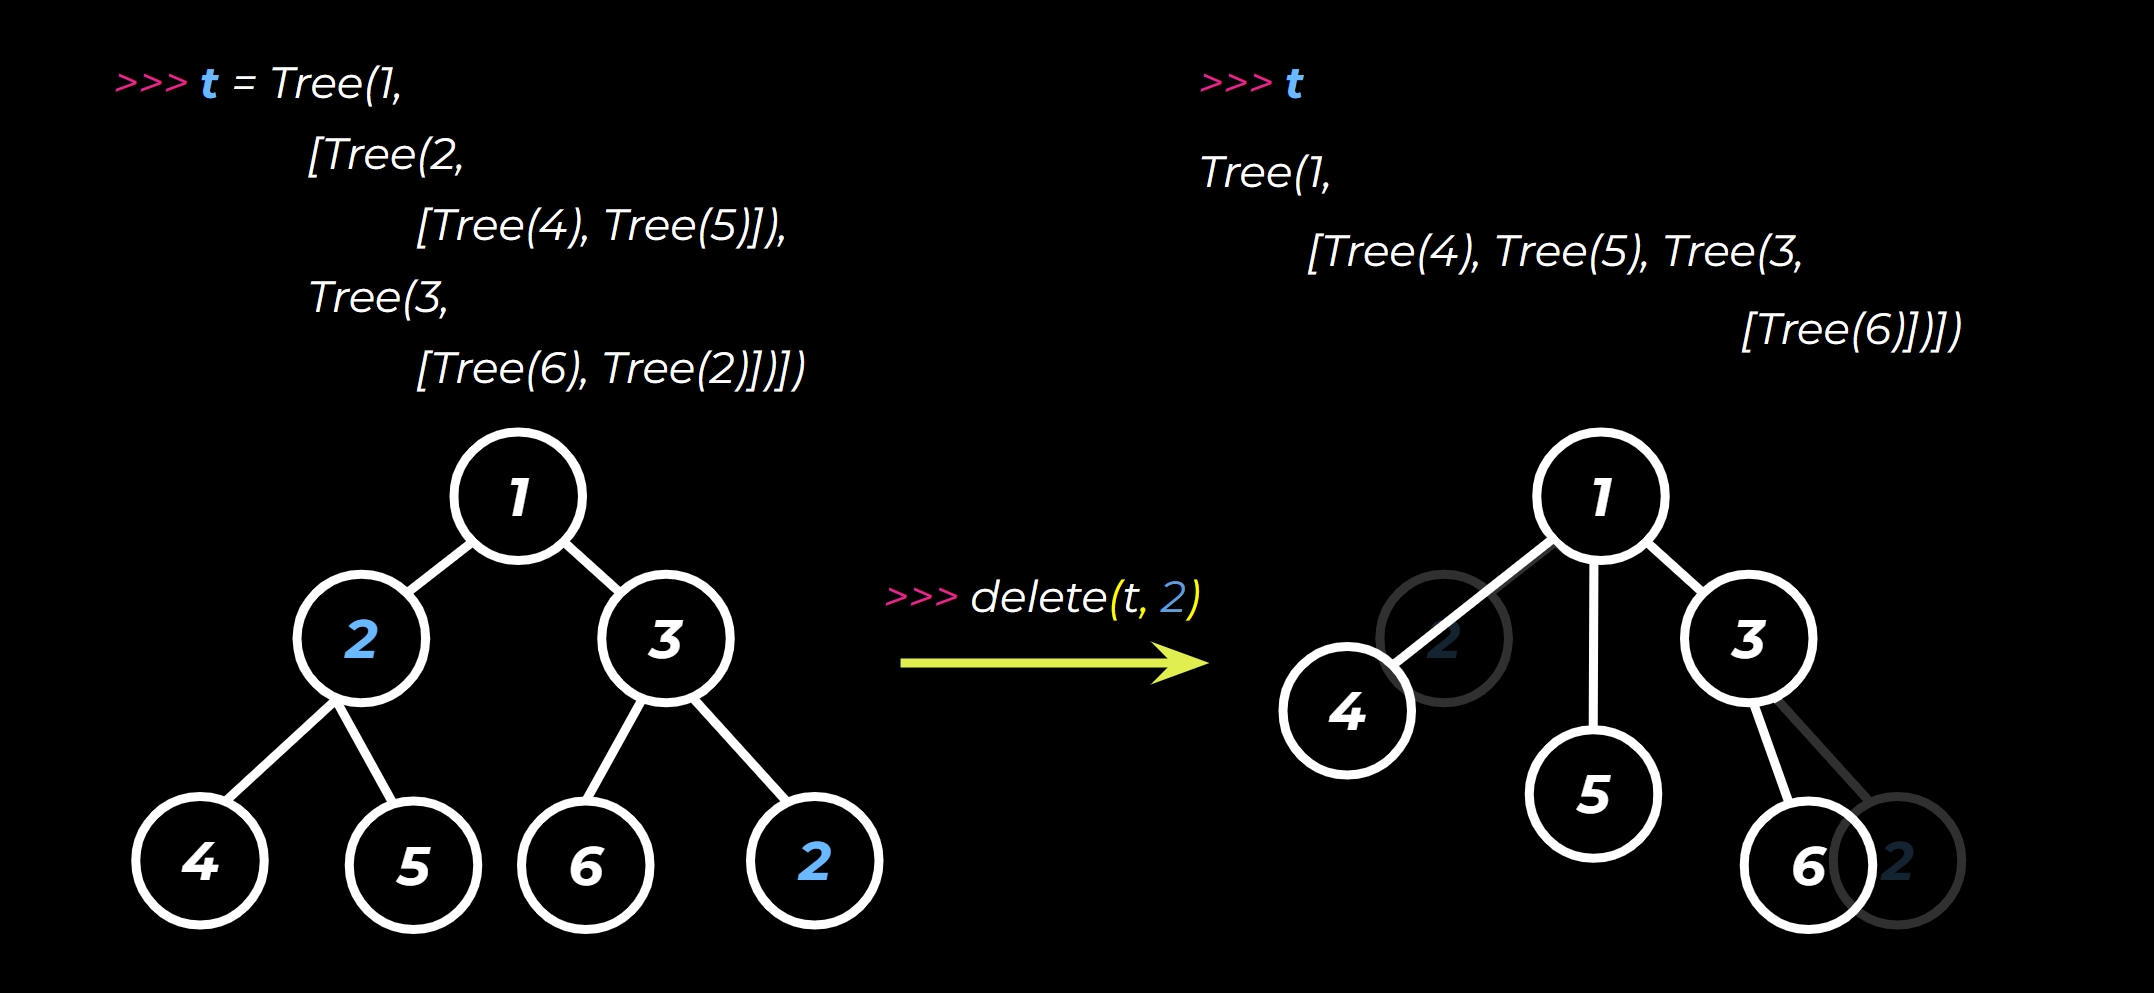

Q2 Tests:

In [ ]:
t = Tree(3, [Tree(2, [Tree(2), Tree(2)]), Tree(2), Tree(2, [Tree(2, [Tree(2), Tree(2)])])])
delete(t, 2)
t

Tree(3)

# **3/24: Linked Lists**

Run below cell (CS 61A's Linked List class implementation) before doing the problems.

In [ ]:
class Link:
    """A linked list."""
    empty = ()

    def __init__(self, first, rest=empty):
        assert rest is Link.empty or isinstance(rest, Link)
        self.first = first
        self.rest = rest

    def __repr__(self):
        if self.rest:
            rest_repr = ', ' + repr(self.rest)
        else:
            rest_repr = ''
        return 'Link(' + repr(self.first) + rest_repr + ')'

    def __str__(self):
        string = '<'
        while self.rest is not Link.empty:
            string += str(self.first) + ' '
            self = self.rest
        return string + str(self.first) + '>'

## Q1: Reverse

In [ ]:
def rev(lnk):
  """
  Return a list that contains the items of a
  Linked List in reverse order.

  l = Link(1, Link(2, Link(3, Link(4, Link(5)))))
  >>> rev(l)
  [5, 4, 3, 2, 1]
  """
  if lnk is Link.empty:
    return []
  else:
    return rev(lnk.rest) + [lnk.first]

Q1 Tests:

In [ ]:
l = Link(1, Link(2, Link(3, Link(4, Link(5)))))
t = rev(l)
assert [5, 4, 3, 2, 1] == t, f'Expected [5, 4, 3, 2, 1] but got {t}.'

## Q2: Bubblink

Key Concepts:
- As hinted by the name, this problem is similar to Overthrow. Except rather than just performing recursive calls on a tree's branches, we have to be more careful since performing a call on Link.empty errors.
- With Linked lists, we only have access to the values of the current and the next node (not the value of its prior node). This is why we stop recursing when the next node points to Link.empty.
- On the 'forward pass', we keep track of all items seen. We use this implementation as opposed to keep tracking of a 'current min' since it's primitive and local to that recursive frame.
  - This is why we use a list, where each frame points to the same list that is updated as we iterate.
- On the 'backward pass', we locate the first item that matches our minimum and bubble it to the front.

In [ ]:
def bubblink(s, k=None):
  """
  Write a function that bubbles the minimum value in the Linked List
  to the front, after a key 'k' is applied to each item.
  The bubble process entails swapping the min item with the item
  before it until it is at the front of the List. In this doctest,
  2 is bubbled to the front since it is the greatest and therefore
  has the smallest negative.

  >>> l = Link(-1, Link(-2, Link(1, Link(2, Link(0)))))
  bubblink(l, lambda x: -x)
  Link(2, Link(-1, Link(-2, Link(1, Link(0)))))
  """
  if s is Link.empty:
      return
      
  def helper(s, seen):
    if s is not Link.empty and s.rest is not Link.empty:
      seen.append(s.rest.first)
      helper(s.rest, seen)
      m = min(seen, key=k)
      if s.rest.first == m:
        s.first, s.rest.first = s.rest.first, s.first
  return helper(s, [s.first])

Q2 Tests:

In [ ]:
l = Link(-1, Link(-2, Link(1, Link(2, Link(0)))))
bubblink(l)
l
# Expected:
# Link(2, Link(-1, Link(-2, Link(1, Link(0)))))

Link(-2, Link(-1, Link(1, Link(0, Link(2)))))

## Q3: Interlink

In [ ]:
def interlink(lst1, lst2):
  """
  Given two Linked Lists, interlink them as shown by the doctest.

  s = Link(1, Link(2, Link(3, Link(4, Link(5)))))
  t = Link(6, Link(7, Link(8, Link(9, Link(10, Link(11))))))
  interlink(s, t)
  >>> s
  Link(1, Link(7, Link(3, Link(9, Link(5, Link(11))))))
  >>> t
  Link(6, Link(2, Link(8, Link(4, Link(10)))))
  """
  if lst1 is not Link.empty and lst2 is not Link.empty:
    tmp1, tmp2 = lst1.rest, lst2.rest
    lst1.rest, lst2.rest = tmp2, tmp1
    interlink(tmp1, tmp2)

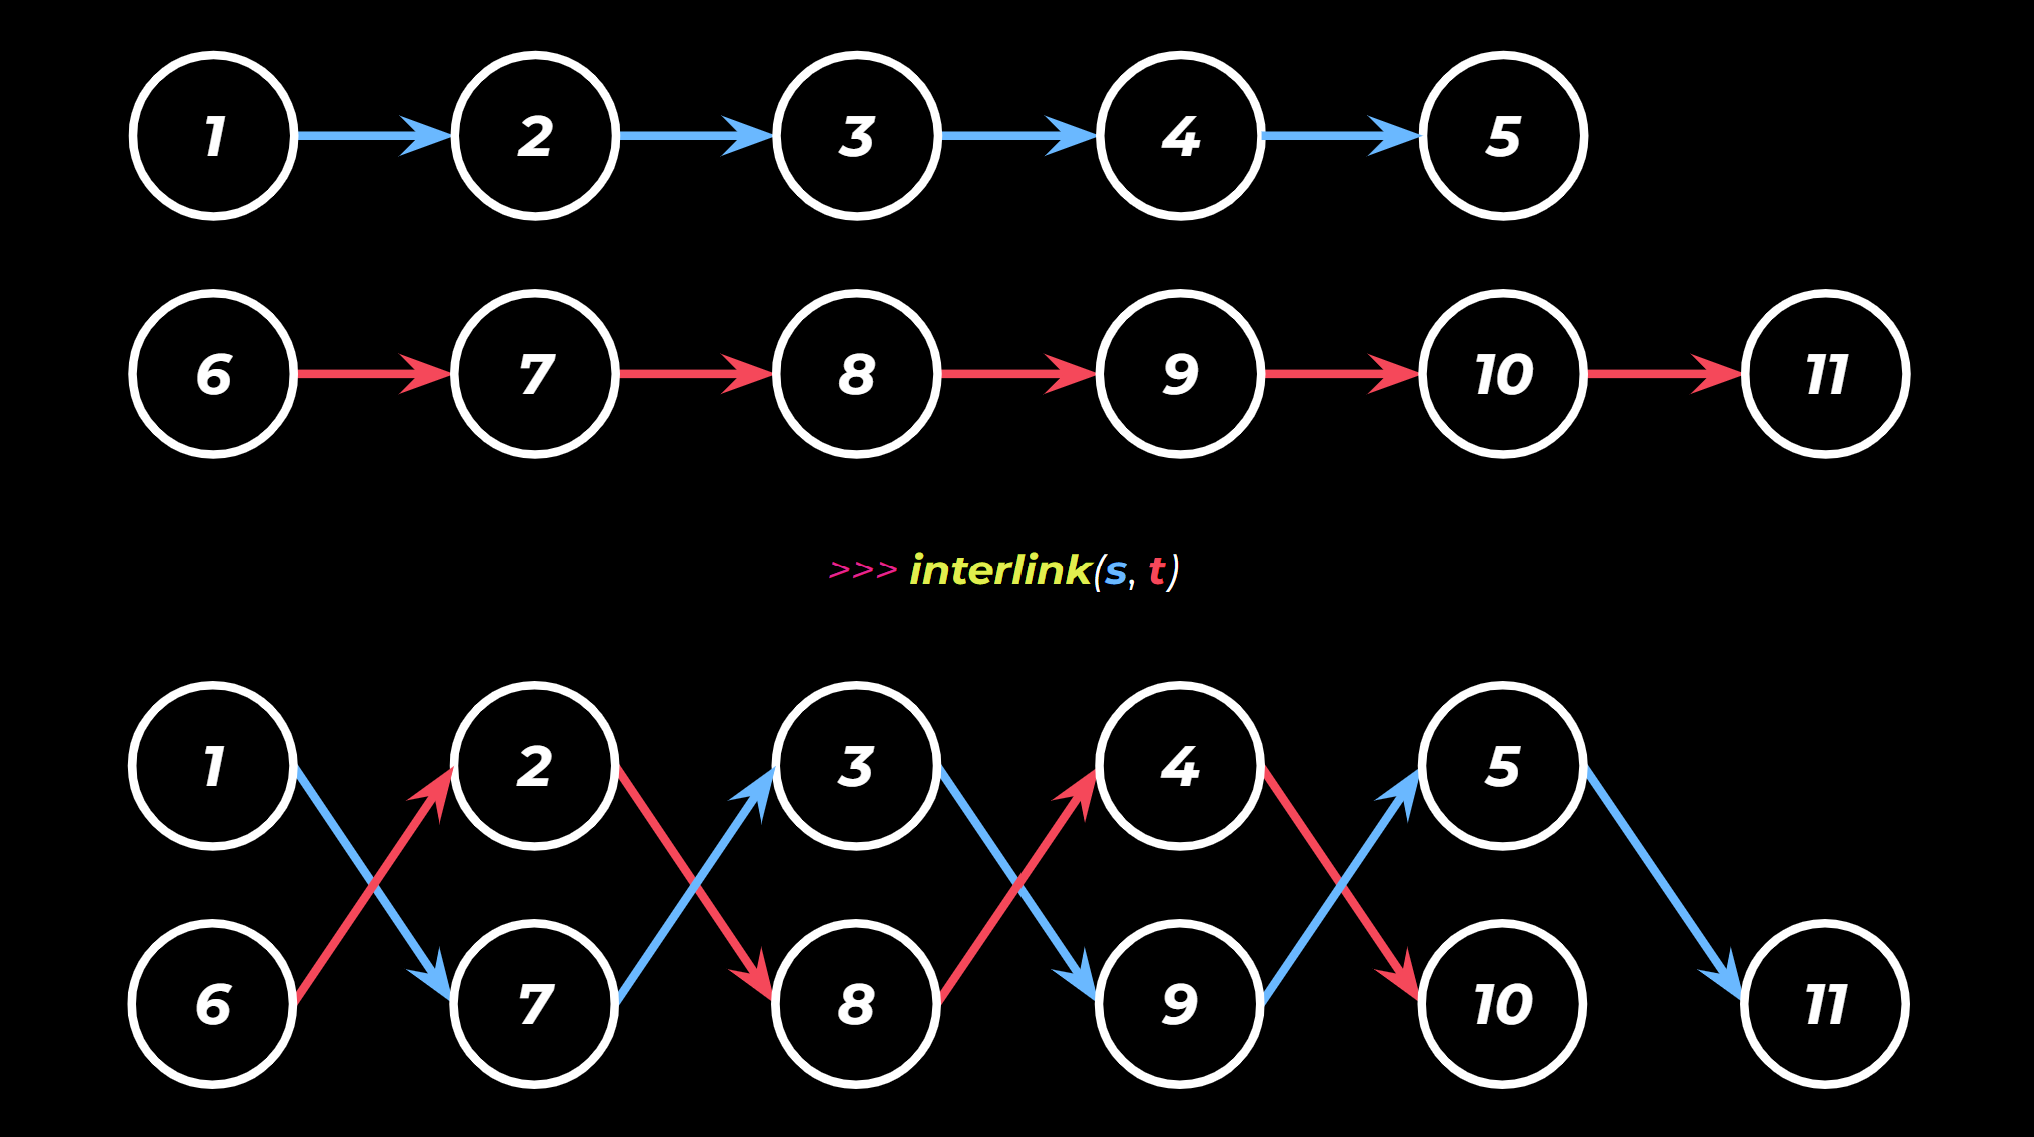